In [ ]:
import matplotlib.pyplot as plt
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
from pandas_datareader import data as web

import ipynb
import ipynb.fs.full.controlNoRebalance as noRebalance
import ipynb.fs.full.controlRebalanceMonthly as monthlyRebalance
import ipynb.fs.full.arimaModel as arimaModel

In [52]:
noRebalanceData = noRebalance.portfolioValue[1:]
noRebalancePortfolioValue = list(map(lambda x: x*100000, noRebalanceData))

monthlyRebalanceData = monthlyRebalance.portfolioValue
monthlyRebalancePortfolioValue = list(map(lambda x: x*100000, monthlyRebalanceData))

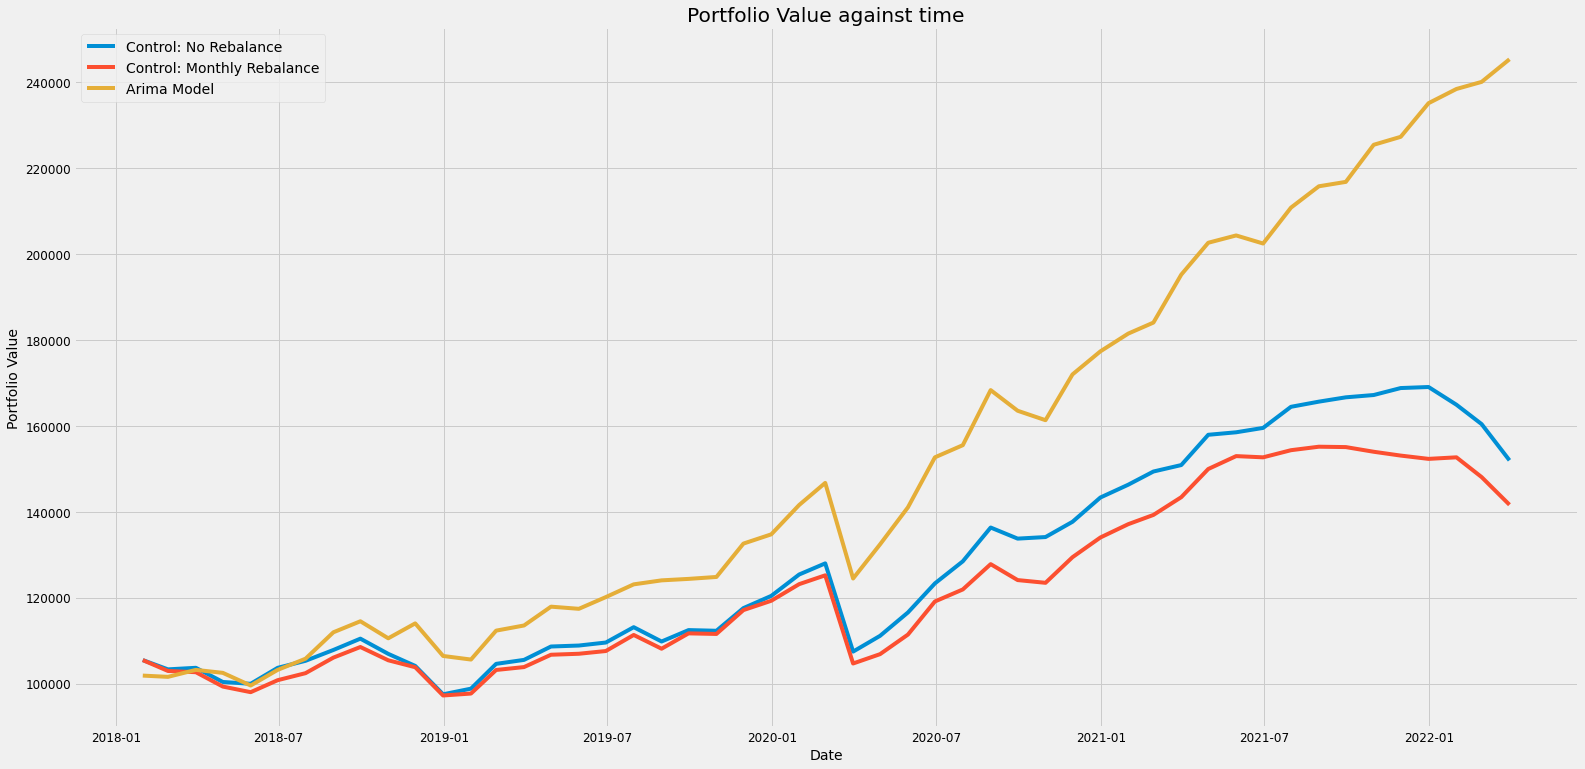

In [56]:
x = noRebalance.data.index[1:]

f, axes = plt.subplots(figsize=(24, 12))
plt.title('Portfolio Value against time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.plot(x,noRebalancePortfolioValue)
plt.plot(x, monthlyRebalancePortfolioValue)
plt.plot(x, arimaModel.portfolioValuesArr)
plt.legend(['Control: No Rebalance', 'Control: Monthly Rebalance', 'Arima Model'])

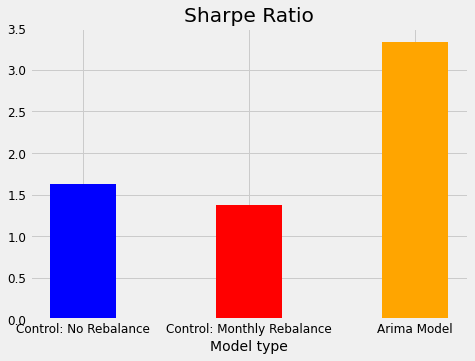

In [74]:
data = {'Control: No Rebalance': noRebalance.sharpeRatio, 'Control: Monthly Rebalance': monthlyRebalance.sharpeRatio, 'Arima Model': arimaModel.sharpeRatio }
# data = {'Control: No Rebalance': 1.63, 'Control: Monthly Rebalance': 1.37, 'Arima Model': 3.34 }
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (7, 5))
 
# creating the bar plot
plt.bar(courses, values, color =['blue', 'red', 'orange'],
        width = 0.4)
 
plt.xlabel("Model type")
plt.title("Sharpe Ratio")
plt.show()